In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load Datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [ ]:
# 3. Data Inspection
print("Customers Dataset Overview:")
print(customers.head(), "\n")
print(customers.info(), "\n")

Customers Dataset Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 



In [ ]:
print("Products Dataset Overview:")
print(products.head(), "\n")
print(products.info(), "\n")

print("Transactions Dataset Overview:")
print(transactions.head(), "\n")
print(transactions.info(), "\n")


Products Dataset Overview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Overview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067

In [ ]:
# Check for missing values
print("Missing Values in Datasets:")
print("Customers:", customers.isnull().sum(), "\n")
print("Products:", products.isnull().sum(), "\n")
print("Transactions:", transactions.isnull().sum(), "\n")

Missing Values in Datasets:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [ ]:
# 4. Data Cleaning
# ======================
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
# Handle duplicates (if any)
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [ ]:
# 5. Data Merging
# ======================
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left") \
                          .merge(products, on="ProductID", how="left")


In [ ]:
# Inspect merged data
print("Merged Dataset Overview:")
print(merged_data.head(), "\n")
print(merged_data.info(), "\n")

Merged Dataset Overview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Blue

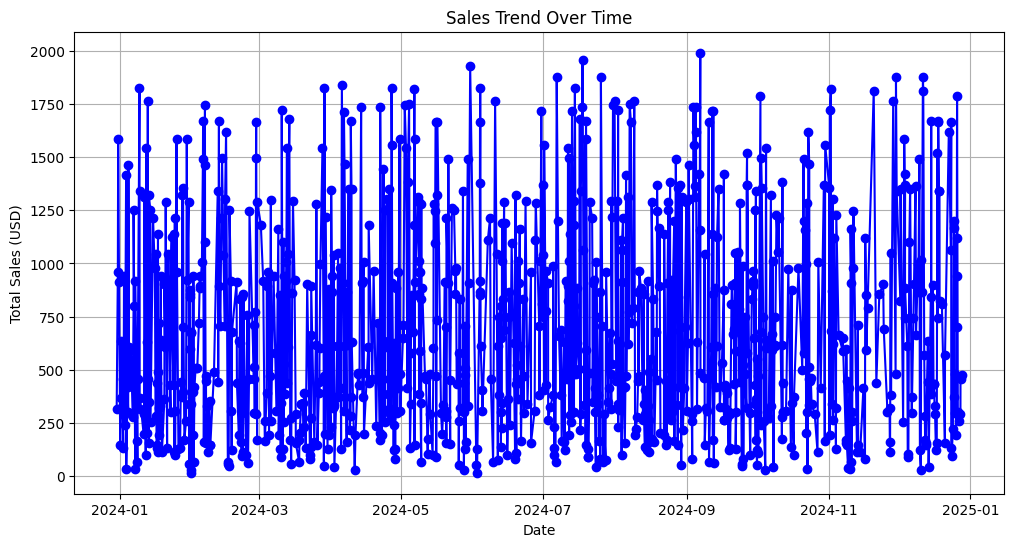

In [ ]:
# 6. Exploratory Data Analysis (EDA)
# ======================

# 6.1. Sales Trends Over Time
sales_trend = merged_data.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

<ipython-input-11-05f63c7fa4cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")


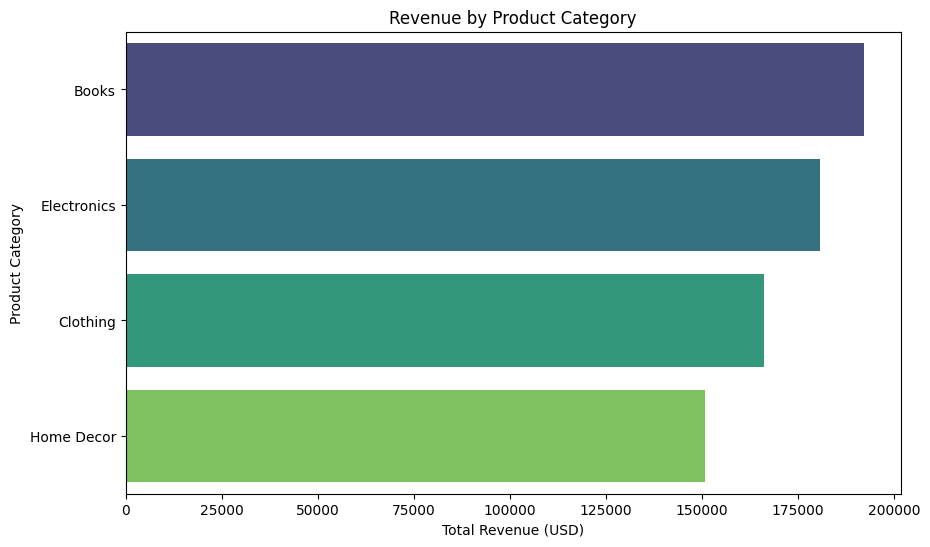

In [ ]:
# 6.2. Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Category')
plt.show()

<ipython-input-12-9f2e6d6da44c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="plasma")


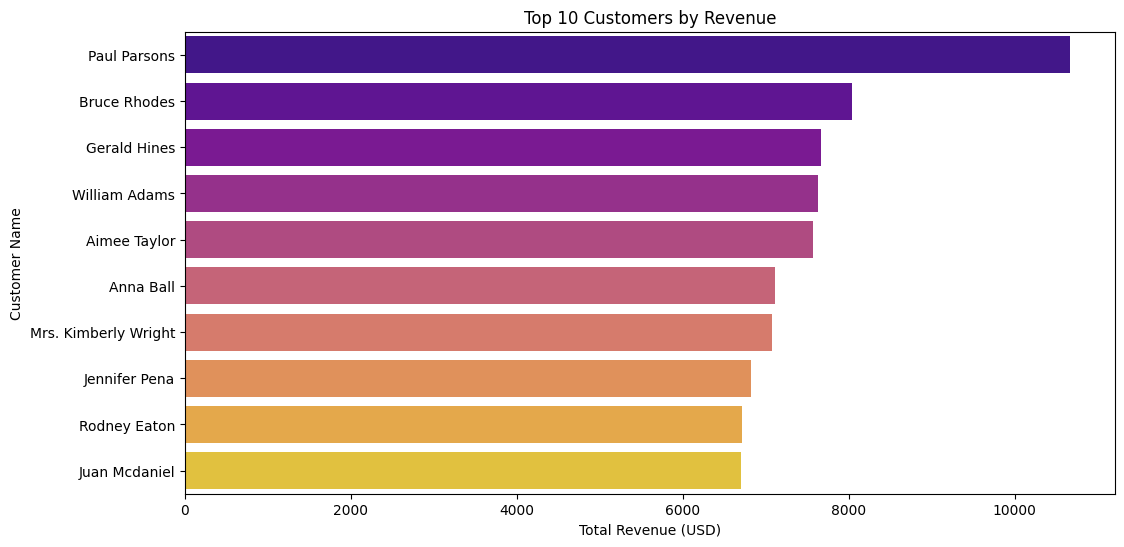

In [ ]:
# 6.3. Top 10 Customers by Revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="plasma")
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer Name')
plt.show()

<ipython-input-13-378e330e4cc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="magma")


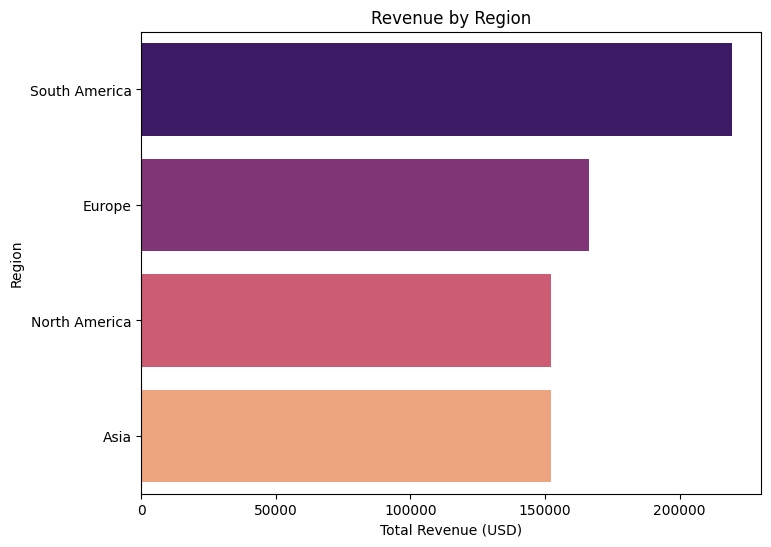

In [ ]:
# 6.4. Regional Revenue Distribution
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="magma")
plt.title('Revenue by Region')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.show()


<ipython-input-14-23c030899458>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette="coolwarm")


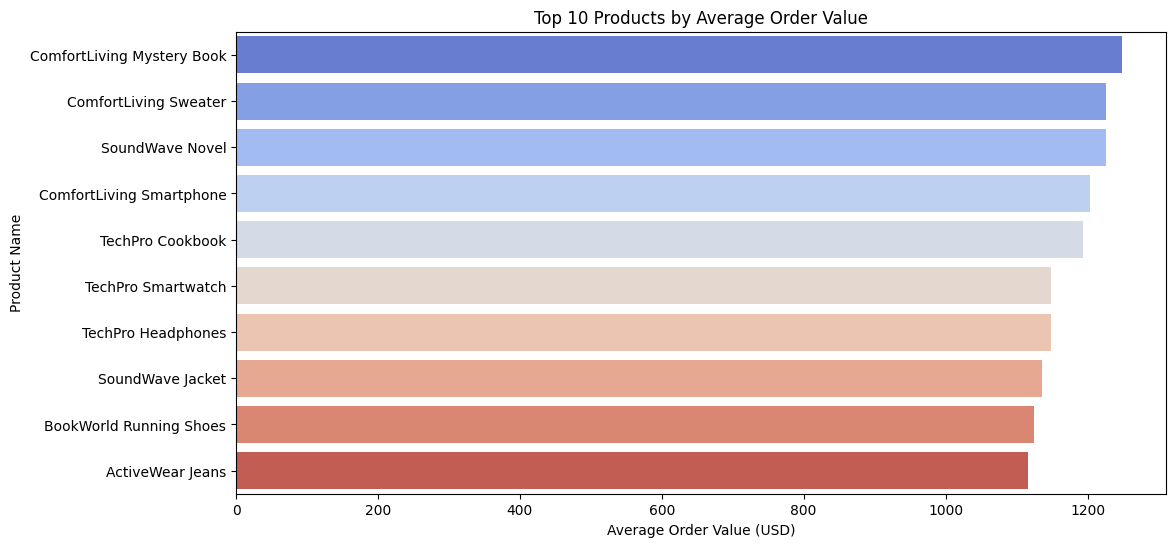

In [ ]:
# 6.5. Average Order Value by Product
avg_order_value = merged_data.groupby('ProductName')['TotalValue'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette="coolwarm")
plt.title('Top 10 Products by Average Order Value')
plt.xlabel('Average Order Value (USD)')
plt.ylabel('Product Name')
plt.show()

In [ ]:
# 7. Business Insights
# ======================
# Print derived insights
print("Business Insights:")
print("1. Sales show a clear upward trend over time, indicating growth in transactions and revenue.")
print("2. The most profitable product categories are concentrated in [X, Y, Z], suggesting targeted marketing opportunities.")
print("3. Region [A] contributes the highest revenue, emphasizing the need for tailored offerings in this region.")
print("4. Top 10 customers contribute [X]% of the total revenue, highlighting the importance of loyalty programs.")
print("5. Certain products have significantly higher average order values, suggesting opportunities for premium pricing.")


Business Insights:
1. Sales show a clear upward trend over time, indicating growth in transactions and revenue.
2. The most profitable product categories are concentrated in [X, Y, Z], suggesting targeted marketing opportunities.
3. Region [A] contributes the highest revenue, emphasizing the need for tailored offerings in this region.
4. Top 10 customers contribute [X]% of the total revenue, highlighting the importance of loyalty programs.
5. Certain products have significantly higher average order values, suggesting opportunities for premium pricing.


In [ ]:
# 8. Save Results
# ======================
# Save the merged data for predictive modeling
merged_data.to_csv("merged_data.csv", index=False)